## Week 2 Lab: Introduction to Data

***

### Markdown Guides

> This is a blockquote.

Some of these words *are emphasized*.

Use two asterisks for **strong emphasis**.

*   Another item in the list.

This is an [example link](http://example.com/).

$x = x + y$

[text to appear as link](#linkhandle)

Images inline
![image](https://imgbbb.com/images/2019/12/18/Screenshot-2019-12-18-at-12.55.36-PM.png)

## Project Description

The Bureau of Transportation Statistics (BTS) is a statistical agency that is a part of the Research and Innovative Technology Administration (RITA). As its name implies, BTS collects and makes available transportation data, such as the flights data we will be working with in this lab.


    year, month, day: Date of departure
    dep_time, arr_time: Departure and arrival times, local timezone.
    dep_delay, arr_delay: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
    carrier: Two letter carrier abbreviation.
        9E: Endeavor Air Inc.
        AA: American Airlines Inc.
        AS: Alaska Airlines Inc.
        B6: JetBlue Airways
        DL: Delta Air Lines Inc.
        EV: ExpressJet Airlines Inc.
        F9: Frontier Airlines Inc.
        FL: AirTran Airways Corporation
        HA: Hawaiian Airlines Inc.
        MQ: Envoy Air
        OO: SkyWest Airlines Inc.
        UA: United Air Lines Inc.
        US: US Airways Inc.
        VX: Virgin America
        WN: Southwest Airlines Co.
        YV: Mesa Airlines Inc.
    tailnum: Plane tail number
    flight: Flight number
    origin, dest: Airport codes for origin and destination. (Google can help you with what code stands for which airport.)
    air_time: Amount of time spent in the air, in minutes.
    distance: Distance flown, in miles.
    hour, minute: Time of departure broken in to hour and minutes.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("nycflights.csv")

In [3]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,2013,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52
32731,2013,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12
32732,2013,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57
32733,2013,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       32735 non-null  int64 
 1   month      32735 non-null  int64 
 2   day        32735 non-null  int64 
 3   dep_time   32735 non-null  int64 
 4   dep_delay  32735 non-null  int64 
 5   arr_time   32735 non-null  int64 
 6   arr_delay  32735 non-null  int64 
 7   carrier    32735 non-null  object
 8   tailnum    32735 non-null  object
 9   flight     32735 non-null  int64 
 10  origin     32735 non-null  object
 11  dest       32735 non-null  object
 12  air_time   32735 non-null  int64 
 13  distance   32735 non-null  int64 
 14  hour       32735 non-null  int64 
 15  minute     32735 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 4.0+ MB


In [5]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,32735.0,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000
mean,2013.0,6.576081,15.777241,1349.265862,12.705147,1502.907408,7.100810,1947.796579,150.441912,1046.244051,13.174462,31.819704
std,0.0,3.413269,8.793983,488.690994,40.407426,532.412363,44.687329,1621.204308,93.527663,733.681907,4.899536,18.226010
min,2013.0,1.000000,1.000000,1.000000,-21.000000,1.000000,-73.000000,1.000000,22.000000,94.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,908.000000,-5.000000,1106.000000,-17.000000,550.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1358.000000,-2.000000,1537.000000,-5.000000,1473.000000,129.000000,888.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1939.000000,14.000000,3416.000000,191.000000,1391.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,6181.000000,686.000000,4983.000000,24.000000,59.000000


In [6]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute'], dtype='object')

Create a new data frame that includes flights headed to SFO in February, and save this data frame as sfo_feb_flights. How many flights meet these criteria? 

In [7]:
sfo_dest = df[df["dest"] == "SFO"]

In [8]:
sfo_dest

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
19,2013,8,18,1638,8,1942,-17,VX,N849VA,27,JFK,SFO,334,2586,16,38
116,2013,12,30,2202,292,130,283,B6,N595JB,415,JFK,SFO,361,2586,22,2
136,2013,1,4,1942,-3,2249,-40,B6,N637JB,645,JFK,SFO,333,2586,19,42
197,2013,10,10,1155,-5,1459,-16,UA,N512UA,766,JFK,SFO,345,2586,11,55
289,2013,10,6,1832,-7,2202,6,UA,N554UA,389,JFK,SFO,333,2586,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,2013,9,14,747,-12,1047,-35,UA,N505UA,397,JFK,SFO,339,2586,7,47
32665,2013,8,18,748,8,1042,-13,VX,N836VA,11,JFK,SFO,333,2586,7,48
32675,2013,9,22,1000,0,1300,-10,UA,N577UA,230,EWR,SFO,335,2565,10,0
32689,2013,4,9,1758,-2,2051,-49,AA,N324AA,177,JFK,SFO,335,2586,17,58


In [9]:
sfo_feb_flights = sfo_dest[sfo_dest["month"] == 2]

In [10]:
sfo_feb_flights

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
535,2013,2,18,1527,57,1903,48,DL,N711ZX,1322,JFK,SFO,358,2586,15,27
813,2013,2,3,613,14,1008,38,UA,N502UA,691,JFK,SFO,367,2586,6,13
1259,2013,2,15,955,-5,1313,-28,DL,N717TW,1765,JFK,SFO,338,2586,9,55
1527,2013,2,18,1928,15,2239,-6,UA,N24212,1214,EWR,SFO,353,2565,19,28
1873,2013,2,24,1340,2,1644,-21,UA,N76269,1111,EWR,SFO,341,2565,13,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,2013,2,21,1745,0,2106,-14,AA,N329AA,177,JFK,SFO,348,2586,17,45
29790,2013,2,3,1055,-5,1405,-20,UA,N510UA,642,JFK,SFO,351,2586,10,55
29806,2013,2,25,1855,0,2220,-20,VX,N624VA,29,JFK,SFO,367,2586,18,55
30563,2013,2,6,1654,-6,2015,-34,DL,N624AG,31,JFK,SFO,355,2586,16,54


Make a histogram and calculate appropriate summary statistics for arrival delays of sfo_feb_flights. Which of the following is false? 

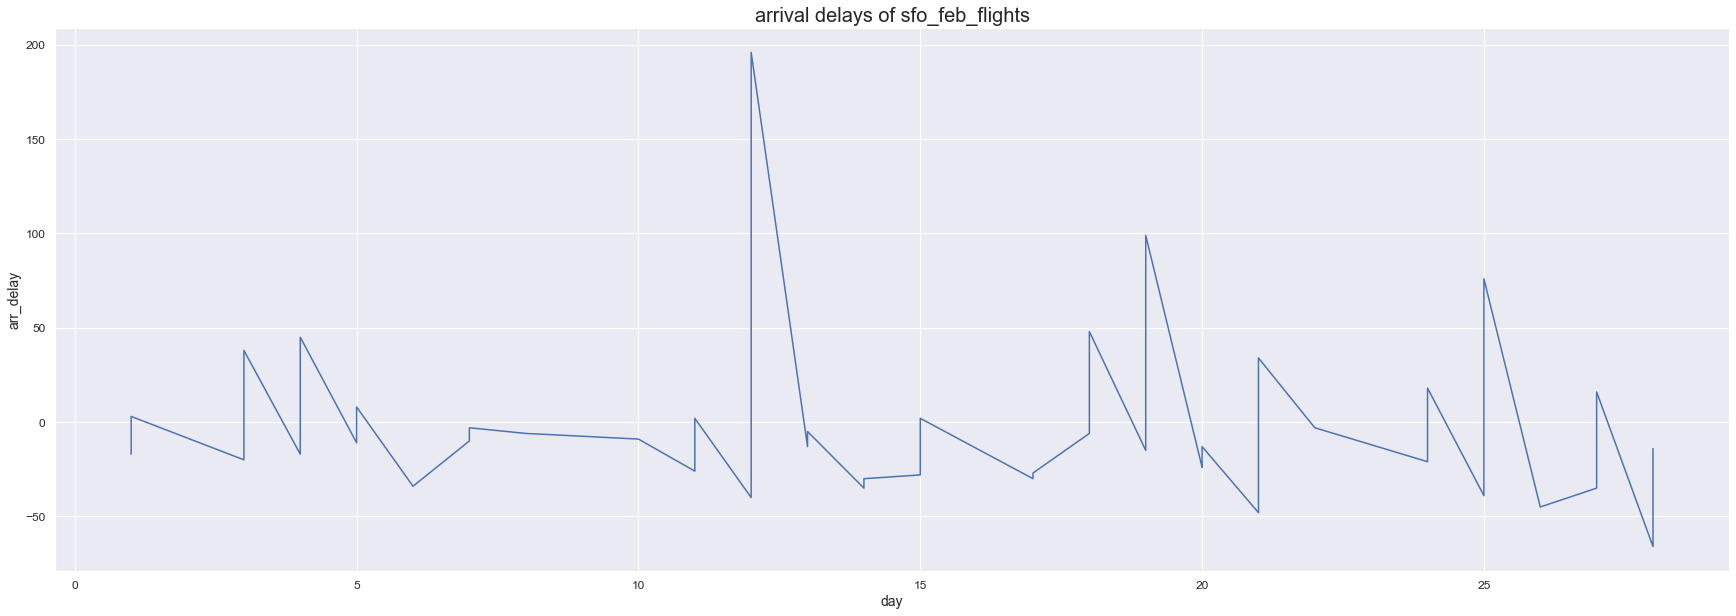

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=sfo_feb_flights.day,y=sfo_feb_flights.arr_delay,data=sfo_feb_flights, estimator=None)
plt.title("arrival delays of sfo_feb_flights", fontsize=20)
plt.show()

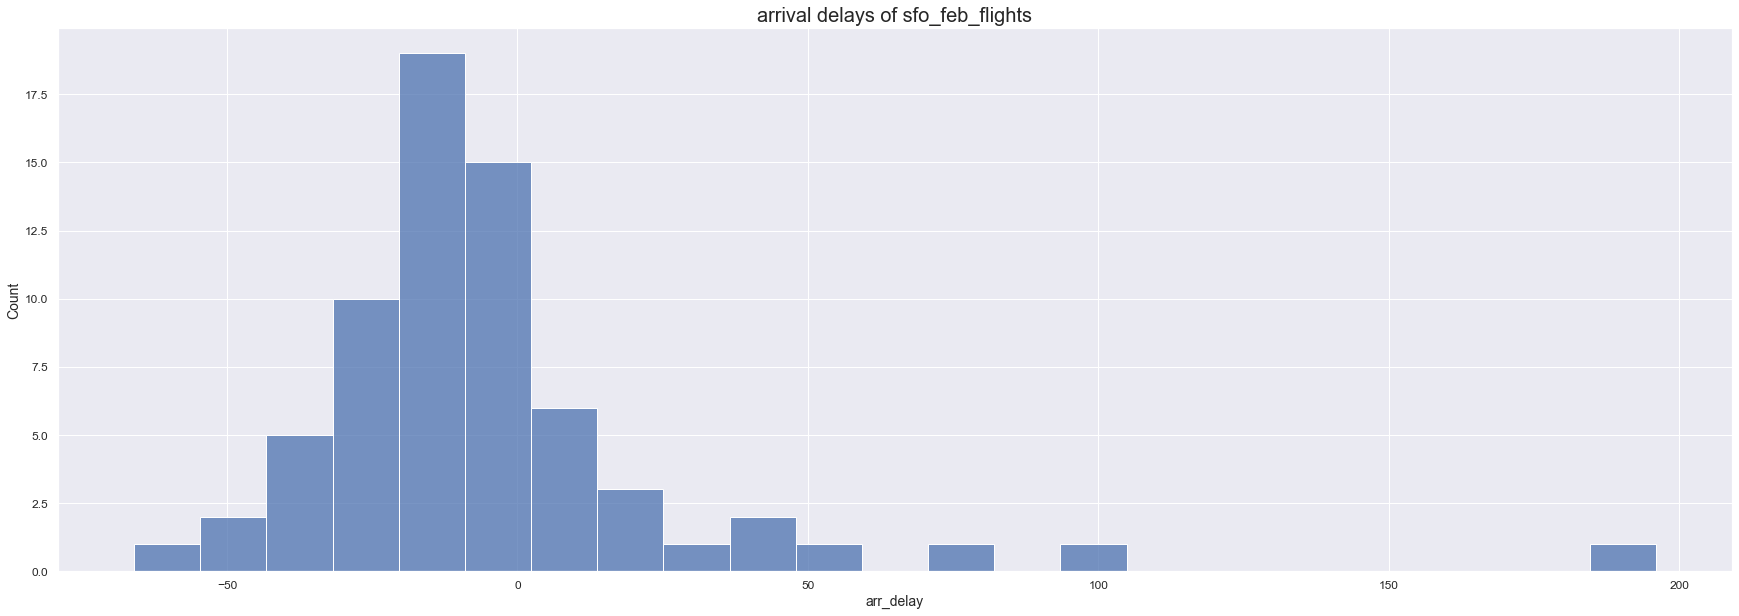

In [12]:
fig = plt.figure(figsize=(30,10))
sns.histplot(x=sfo_feb_flights.arr_delay,data=sfo_feb_flights)
plt.title("arrival delays of sfo_feb_flights", fontsize=20)
plt.show()

In [13]:
sfo_feb_flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,68.0,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2013.0,2.0,15.264706,1298.117647,10.500000,1607.294118,-4.500000,795.058824,351.882353,2583.529412,12.617647,36.352941
std,0.0,0.0,8.468762,462.709429,33.279683,476.904166,36.280623,742.486944,12.958636,6.816290,4.652168,16.696380
min,2013.0,2.0,1.000000,613.000000,-10.000000,118.000000,-66.000000,11.000000,317.000000,2565.000000,6.000000,1.000000
25%,2013.0,2.0,7.000000,943.000000,-5.000000,1233.250000,-21.250000,85.000000,345.000000,2586.000000,9.000000,25.000000
50%,2013.0,2.0,16.000000,1268.500000,-2.000000,1497.000000,-11.000000,641.000000,354.000000,2586.000000,12.500000,33.500000
75%,2013.0,2.0,22.500000,1742.000000,9.000000,2062.500000,2.000000,1487.250000,360.000000,2586.000000,17.000000,54.000000
max,2013.0,2.0,28.000000,2159.000000,209.000000,2256.000000,196.000000,2126.000000,376.000000,2586.000000,21.000000,59.000000


Calculate the median and interquartile range for arr_delays of flights in the sfo_feb_flights data frame, grouped by carrier. Which carrier has the highest IQR of arrival delays?

In [14]:
sfo_feb_flights.groupby("carrier").mean()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
carrier,,,,,,,,,,,,
AA,2013.0,2.0,16.400000,1400.400000,21.400000,1741.500000,11.500000,135.400000,352.500000,2586.0,13.700000,30.400000
B6,2013.0,2.0,10.000000,934.833333,-0.333333,1275.666667,-6.333333,641.666667,360.500000,2586.0,9.000000,34.833333
DL,2013.0,2.0,14.000000,1277.315789,3.105263,1640.473684,-13.473684,1661.684211,353.052632,2586.0,12.315789,45.736842
UA,2013.0,2.0,14.476190,1338.619048,13.523810,1563.952381,1.809524,810.285714,347.857143,2578.0,13.047619,33.857143
VX,2013.0,2.0,20.333333,1356.583333,13.250000,1684.583333,-13.750000,22.666667,352.250000,2586.0,13.250000,31.583333


Which month has the highest average departure delay from an NYC airport? 

In [15]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2


In [16]:
df["origin"].unique()

array(['JFK', 'LGA', 'EWR'], dtype=object)

In [17]:
df.groupby("month")["dep_delay"].mean()

month
1     10.233333
2     10.687227
3     13.517602
4     14.554477
5     13.264800
6     20.350293
7     20.754559
8     12.619097
9      6.872436
10     5.880374
11     6.103183
12    17.368189
Name: dep_delay, dtype: float64

Which month has the highest median departure delay from an NYC airport? 

In [18]:
df.groupby("month")["dep_delay"].median()

month
1    -2
2    -2
3    -1
4    -2
5    -1
6     0
7     0
8    -1
9    -3
10   -3
11   -2
12    1
Name: dep_delay, dtype: int64

Is the mean or the median a more reliable measure for deciding which month(s) to avoid flying if you really dislike delayed flights, and why? 

Median would be more reliable as the distribution of delays is skewed.

If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of? 

In [19]:
on_time = df[df["dep_delay"] == 0]

In [20]:
on_time

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
37,2013,12,18,730,0,1038,-2,AA,N3KCAA,29,LGA,PBI,140,1035,7,30
92,2013,7,4,1125,0,1411,-29,AA,N3BNAA,2099,LGA,MIA,150,1096,11,25
110,2013,7,24,1641,0,1904,-9,EV,N12996,3854,EWR,ATL,123,746,16,41
114,2013,11,26,1545,0,1900,-20,AA,N324AA,133,JFK,LAX,334,2475,15,45
127,2013,11,12,859,0,1237,38,AA,N3FHAA,1121,LGA,DFW,209,1389,8,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32640,2013,9,24,1934,0,2040,-14,UA,N37462,1703,EWR,BOS,35,200,19,34
32675,2013,9,22,1000,0,1300,-10,UA,N577UA,230,EWR,SFO,335,2565,10,0
32697,2013,12,19,1535,0,1836,-21,B6,N304JB,1729,JFK,RSW,163,1074,15,35
32698,2013,7,19,1542,0,1718,2,UA,N15712,1638,EWR,CLE,66,404,15,42


In [21]:
on_time.groupby("origin").count()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,dest,air_time,distance,hour,minute
origin,,,,,,,,,,,,,,,
EWR,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567
JFK,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617
LGA,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443


Mutate the data frame so that it includes a new variable that contains the average speed, avg_speed traveled by the plane for each flight (in mph). What is the tail number of the plane with the fastest avg_speed? 

In [22]:
df["avg_speed"] = df["distance"] / df["air_time"]

In [23]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,7.907348
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,7.398148
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,6.582447
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,7.444444
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,5.920000


In [24]:
df.sort_values(by="avg_speed")

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
24516,2013,1,28,1917,52,2118,103,US,N755US,1860,LGA,PHL,75,96,19,17,1.280000
17253,2013,7,19,559,-1,713,18,US,N959UW,1629,LGA,PHL,52,96,5,59,1.846154
1373,2013,4,22,946,-9,1134,26,9E,N8623A,3608,JFK,PHL,50,94,9,46,1.880000
396,2013,5,24,553,-7,712,17,US,N957UW,1289,LGA,PHL,50,96,5,53,1.920000
5544,2013,5,11,738,-7,842,-10,US,N957UW,1821,LGA,PHL,49,96,7,38,1.959184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2013,2,22,831,4,1258,-18,B6,N568JB,403,JFK,SJU,175,1598,8,31,9.131429
28479,2013,3,9,2214,79,229,43,B6,N656JB,701,JFK,SJU,175,1598,22,14,9.131429
21580,2013,11,16,2349,-10,402,-38,B6,N571JB,1503,JFK,SJU,173,1598,23,49,9.236994
1266,2013,2,21,2355,-3,412,-26,B6,N779JB,707,JFK,SJU,172,1598,23,55,9.290698


Make a scatterplot of avg_speed vs. distance. Which of the following is true about the relationship between average speed and distance

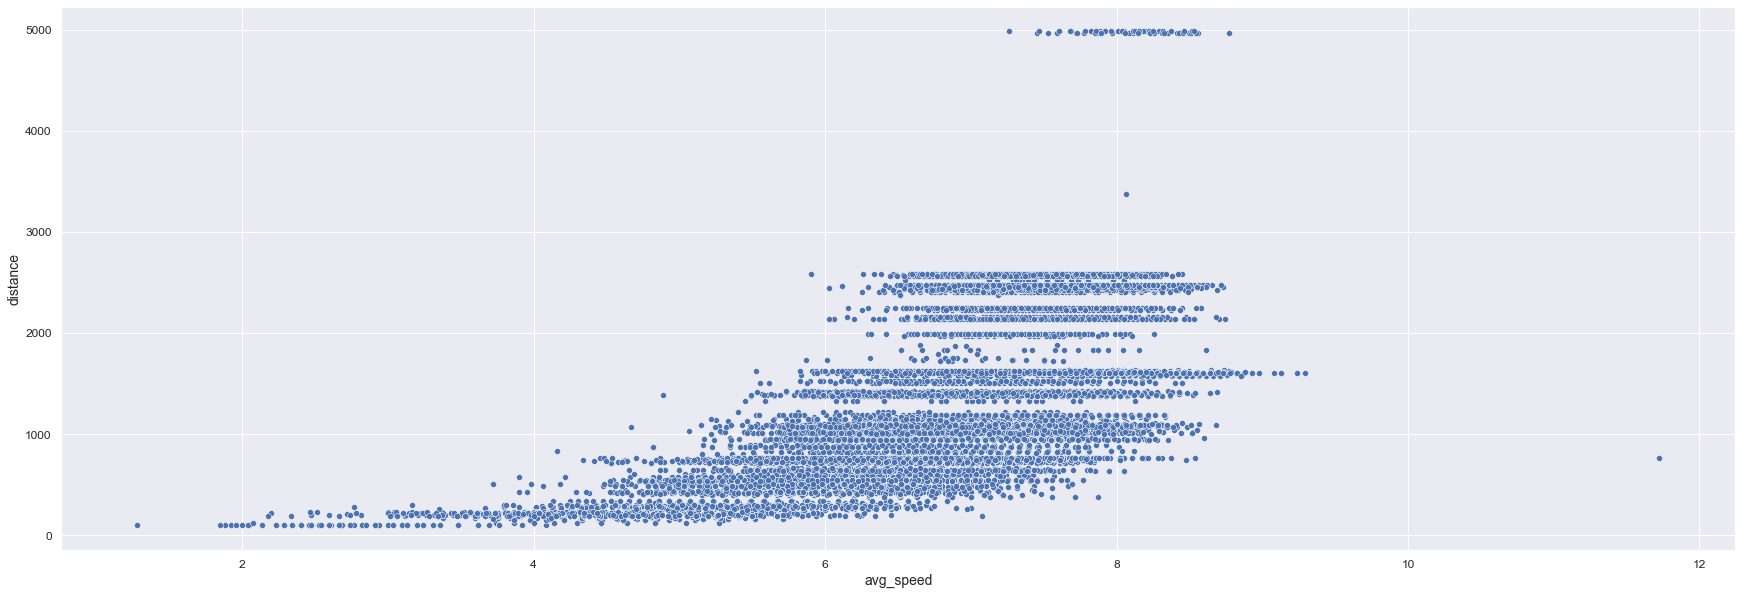

In [25]:
fig = plt.figure(figsize=(30,10))
sns.scatterplot(x=df.avg_speed,y=df.distance,data=df, estimator=None)
plt.title("")
plt.show()

There is an overall positive association between distance and average speed.

Suppose you define a flight to be “on time” if it gets to the destination on time or earlier than expected, regardless of any departure delays. Mutate the data frame to create a new variable called arr_type with levels "on time" and "delayed" based on this definition. Then, determine the on time arrival percentage based on whether the flight departed on time or not. What proportion of flights that were "delayed" departing arrive "on time"?

In [26]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,7.907348
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,7.398148
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,6.582447
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,7.444444
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,5.920000


In [27]:
df["arr_delay"].value_counts()

-13     750
-11     707
-10     707
-14     704
-12     698
       ... 
 386      1
 434      1
 802      1
 297      1
 847      1
Name: arr_delay, Length: 404, dtype: int64

In [28]:
df["arr_type"] = df["arr_delay"].apply(lambda x: 0 if x < 0 else 1)

In [29]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed,arr_type
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,7.907348,0
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,7.398148,1
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,6.582447,1
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,7.444444,0
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,5.920000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,2013,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52,5.396825,0
32731,2013,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12,7.860140,1
32732,2013,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57,7.777778,0
32733,2013,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44,6.838710,1


In [30]:
len(df.arr_type)

32735

In [31]:
df.arr_type.value_counts()

0    18724
1    14011
Name: arr_type, dtype: int64

In [32]:
ontimearrivalpercentage = 14011 / 32735

In [33]:
ontimearrivalpercentage

0.42801283030395604

## Data Visualization

### Pairplots

<Figure size 1440x1440 with 0 Axes>

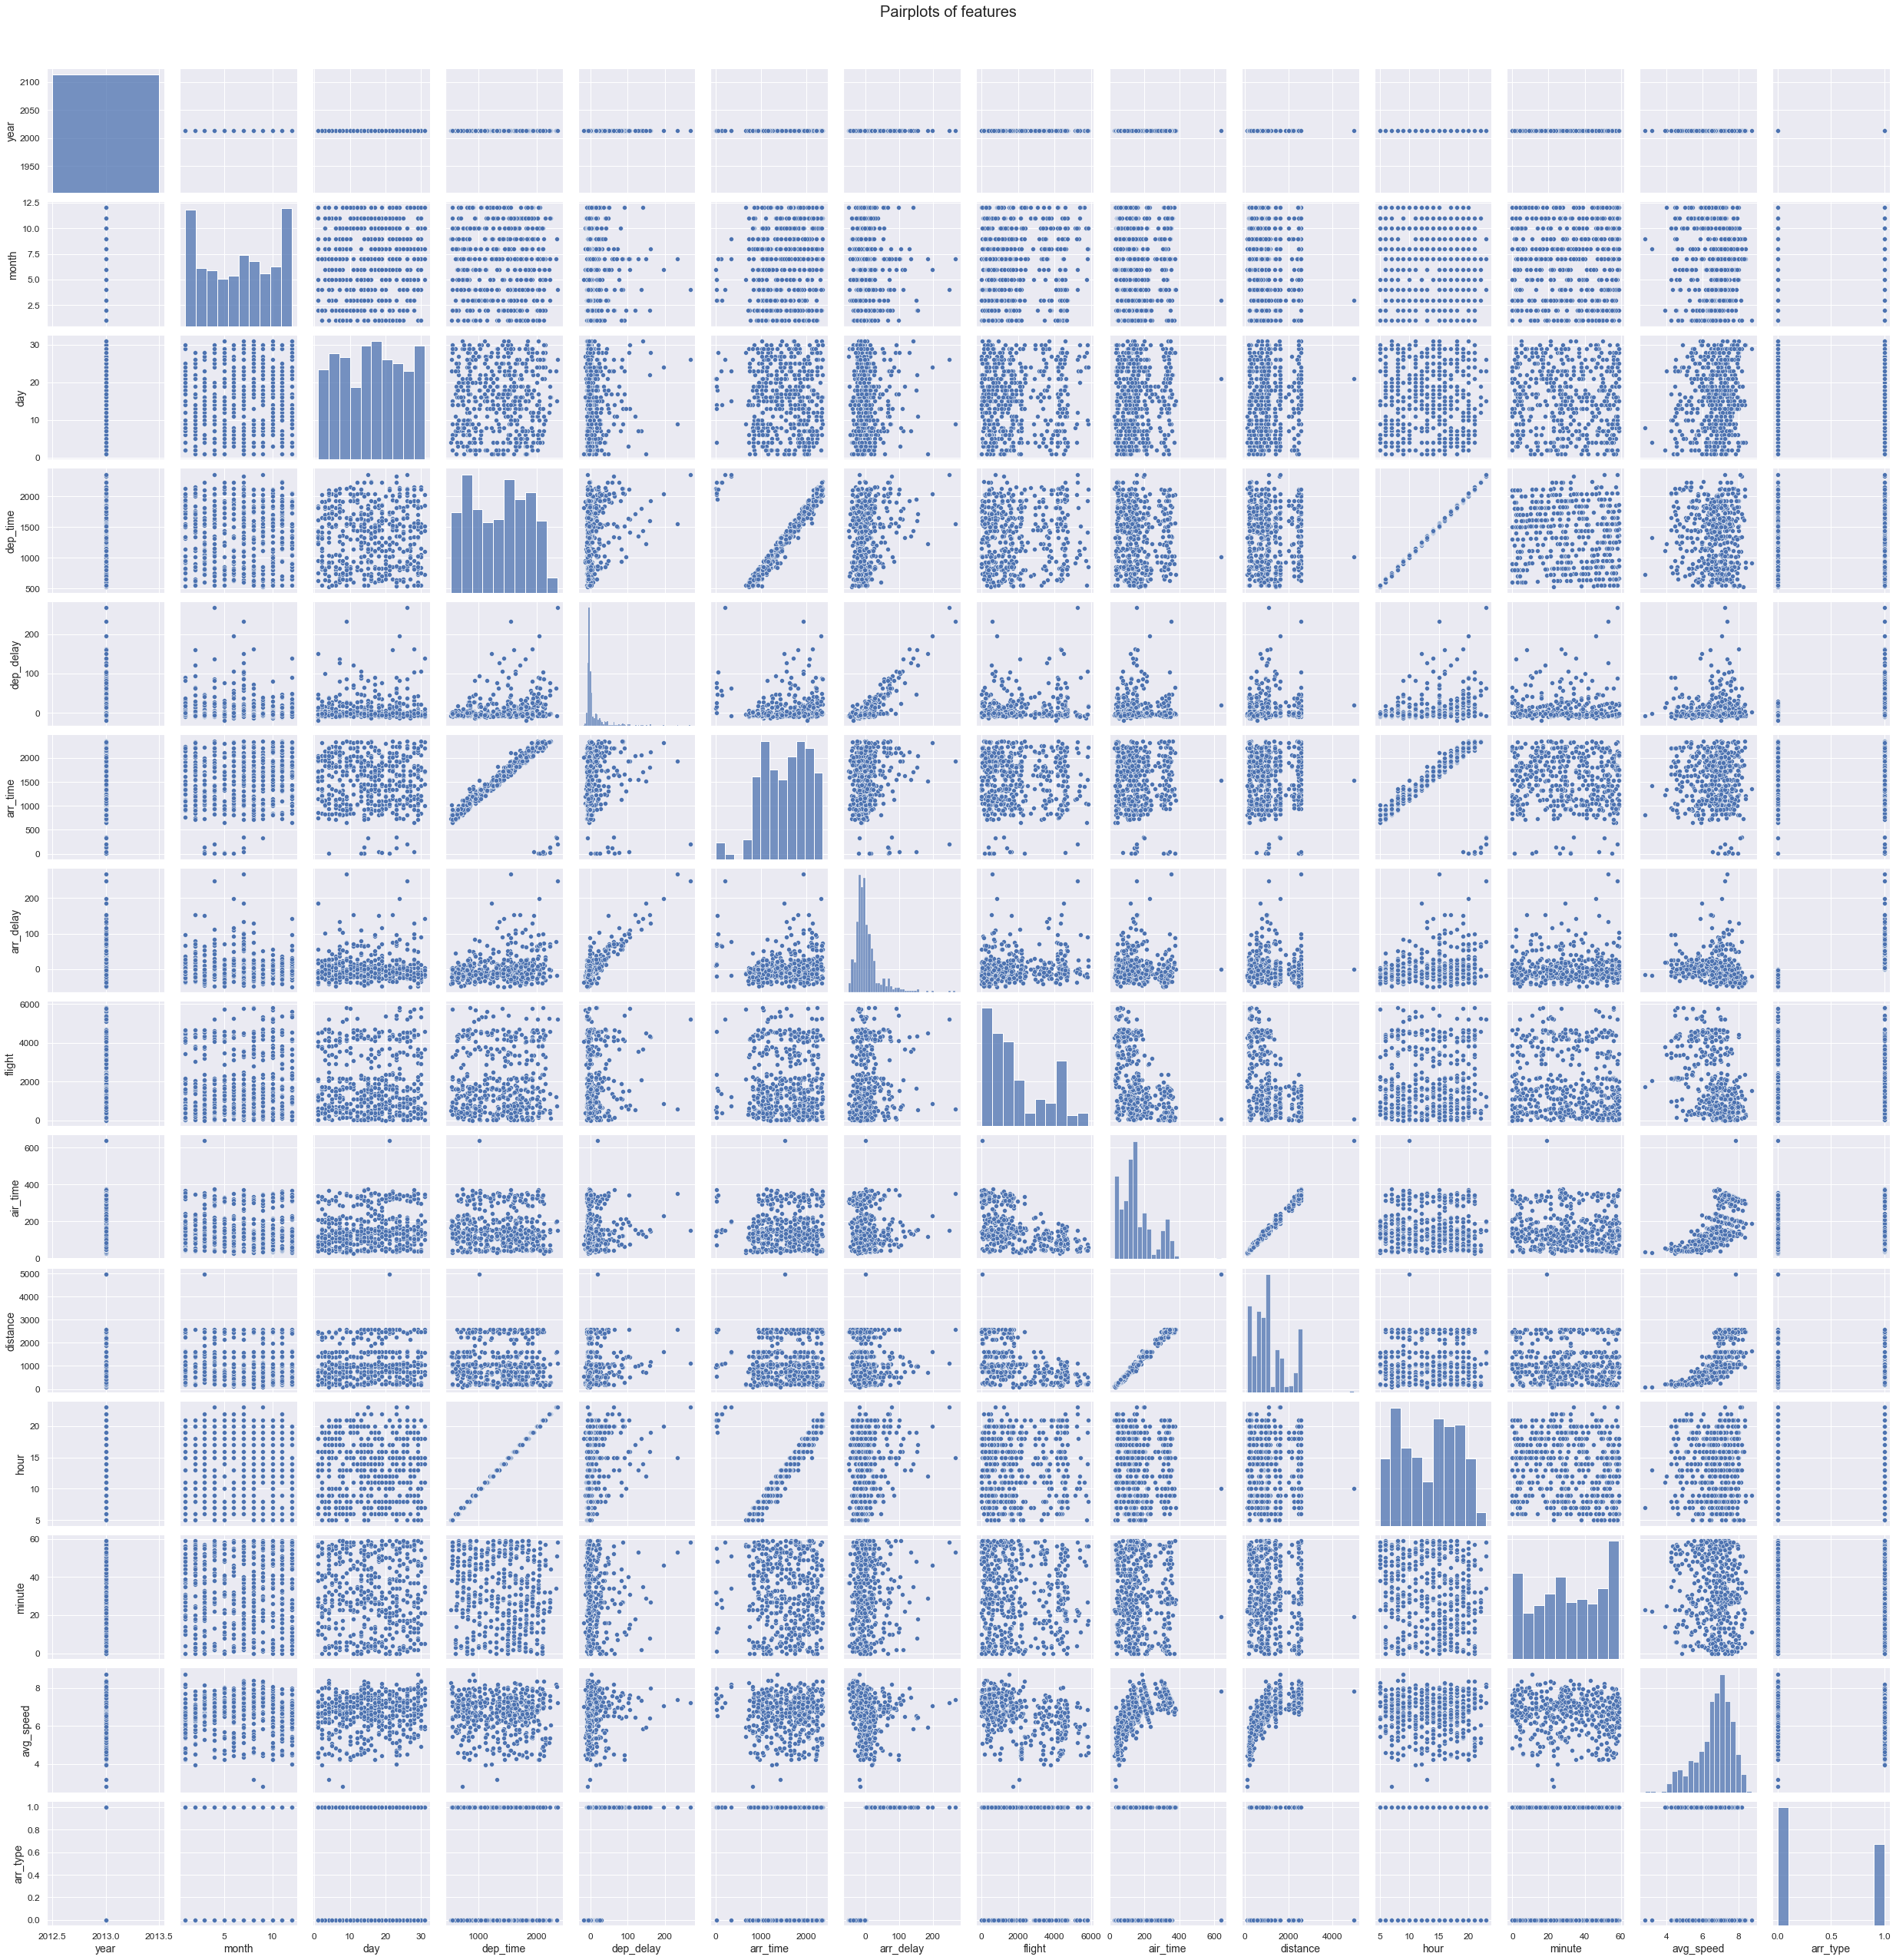

In [34]:
plt.figure(figsize=(20,20))

sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Correlation

In [35]:
df.corr()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,avg_speed,arr_type
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.010448,-0.003465,-0.019147,-0.003607,-0.016613,0.001237,0.013891,0.022215,-0.003476,0.000549,0.058089,-0.014226
day,NaN,0.010448,1.000000,0.002120,0.000394,-0.007251,-0.004297,0.011623,0.008394,0.009873,0.002242,-0.003435,0.012353,-0.012686
dep_time,NaN,-0.003465,0.002120,1.000000,0.259294,0.663912,0.231963,0.042623,-0.021108,-0.020562,0.999310,-0.050719,-0.033623,0.191049
dep_delay,NaN,-0.019147,0.000394,0.259294,1.000000,0.042252,0.916062,0.049191,-0.013428,-0.012698,0.260793,-0.058273,-0.004905,0.437615
arr_time,NaN,-0.003607,-0.007251,0.663912,0.042252,1.000000,0.034434,0.029441,0.054138,0.047370,0.663450,-0.033566,-0.001876,0.088846
arr_delay,NaN,-0.016613,-0.004297,0.231963,0.916062,0.034434,1.000000,0.069369,-0.028240,-0.054456,0.233301,-0.052042,-0.133202,0.607933
flight,NaN,0.001237,0.011623,0.042623,0.049191,0.029441,0.069369,1.000000,-0.473601,-0.482533,0.042893,-0.010210,-0.377983,0.055231
air_time,NaN,0.013891,0.008394,-0.021108,-0.013428,0.054138,-0.028240,-0.473601,1.000000,0.990724,-0.020386,-0.017955,0.613353,0.008548
distance,NaN,0.022215,0.009873,-0.020562,-0.012698,0.047370,-0.054456,-0.482533,0.990724,1.000000,-0.019885,-0.016782,0.683148,-0.030028


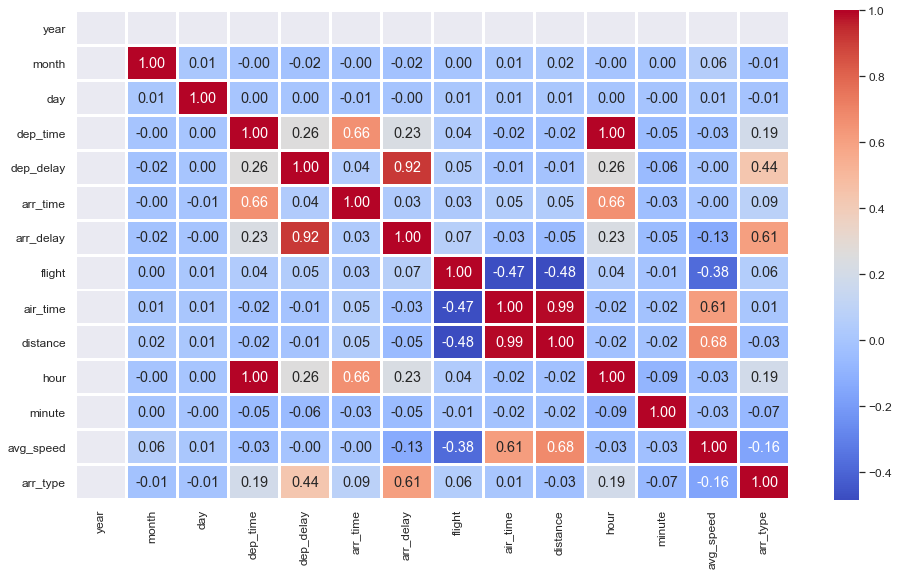

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

#### Python code done by Dennis Lam